In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

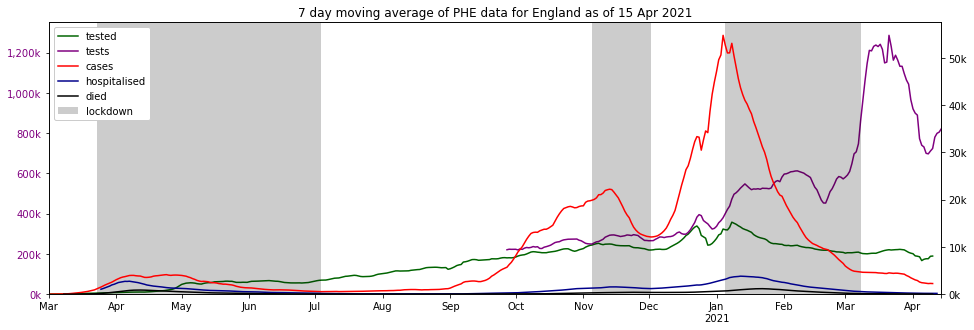

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

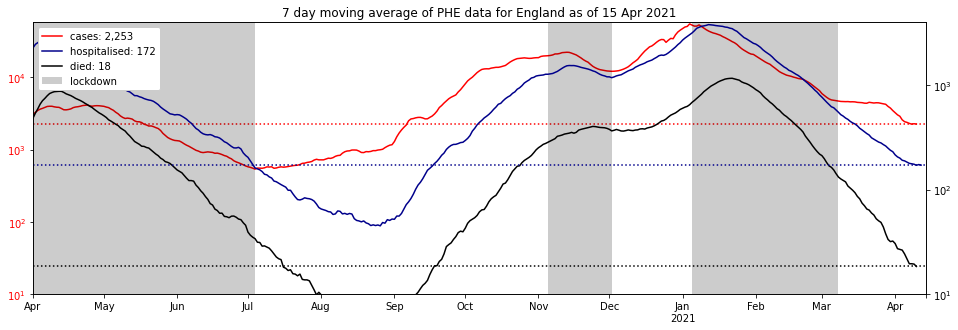

In [3]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

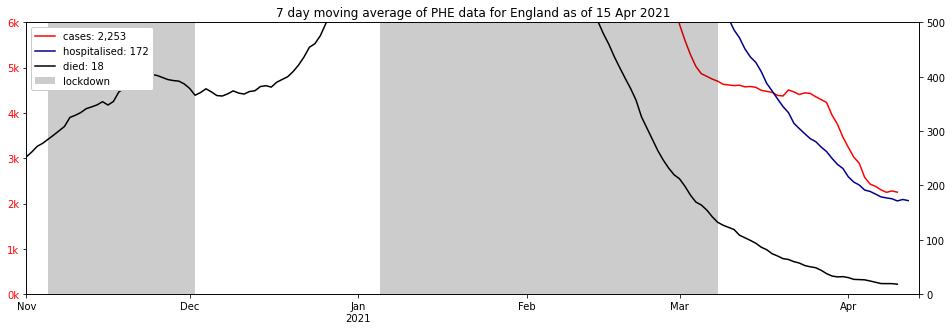

In [4]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=6_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=500)

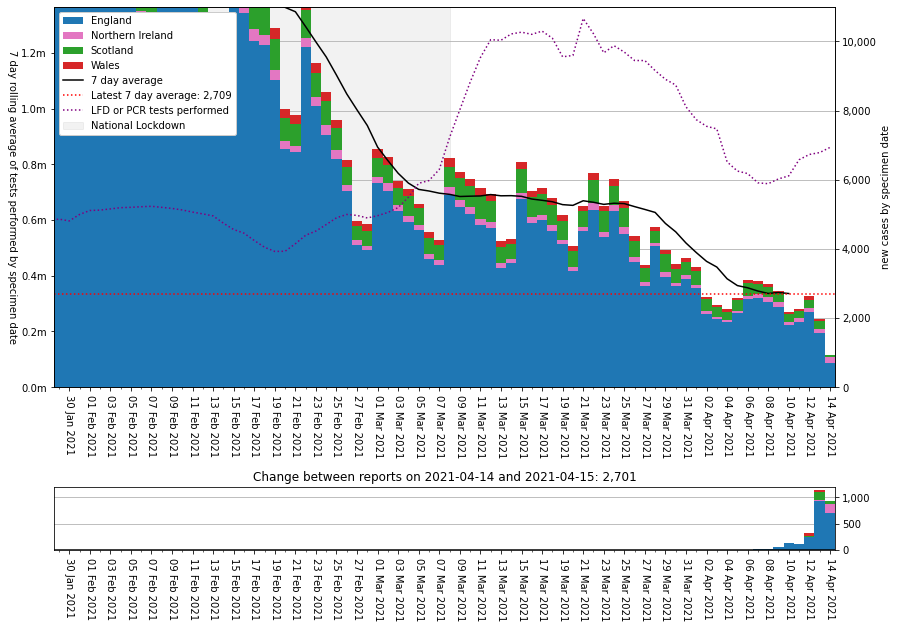

In [5]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

In [6]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,14 Apr 21,"+7,054,720","+27,251,419","+7,054,720","+292,383","+79,117","+292,383"
Northern Ireland,14 Apr 21,"+237,281","+844,284","+237,281","+13,152","+6,235","+13,152"
Scotland,14 Apr 21,"+661,975","+2,708,691","+661,975","+27,553","+13,720","+27,553"
Wales,14 Apr 21,"+559,888","+1,640,045","+559,888","+10,695","+18,763","+10,695"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,7054720.0,27251419.0,20196699.0,56286961,12.533489,35.881665,51.584846
1,Northern Ireland,N92000002,237281.0,844284.0,607003.0,1893667,12.530239,32.054369,55.415392
2,Scotland,S92000003,661975.0,2708691.0,2046716.0,5463300,12.116761,37.462999,50.420241
3,Wales,W92000004,559888.0,1640045.0,1080157.0,3152879,17.757992,34.259386,47.982622


'partial: 32,444,439 (48.6%), full: 8,513,864'

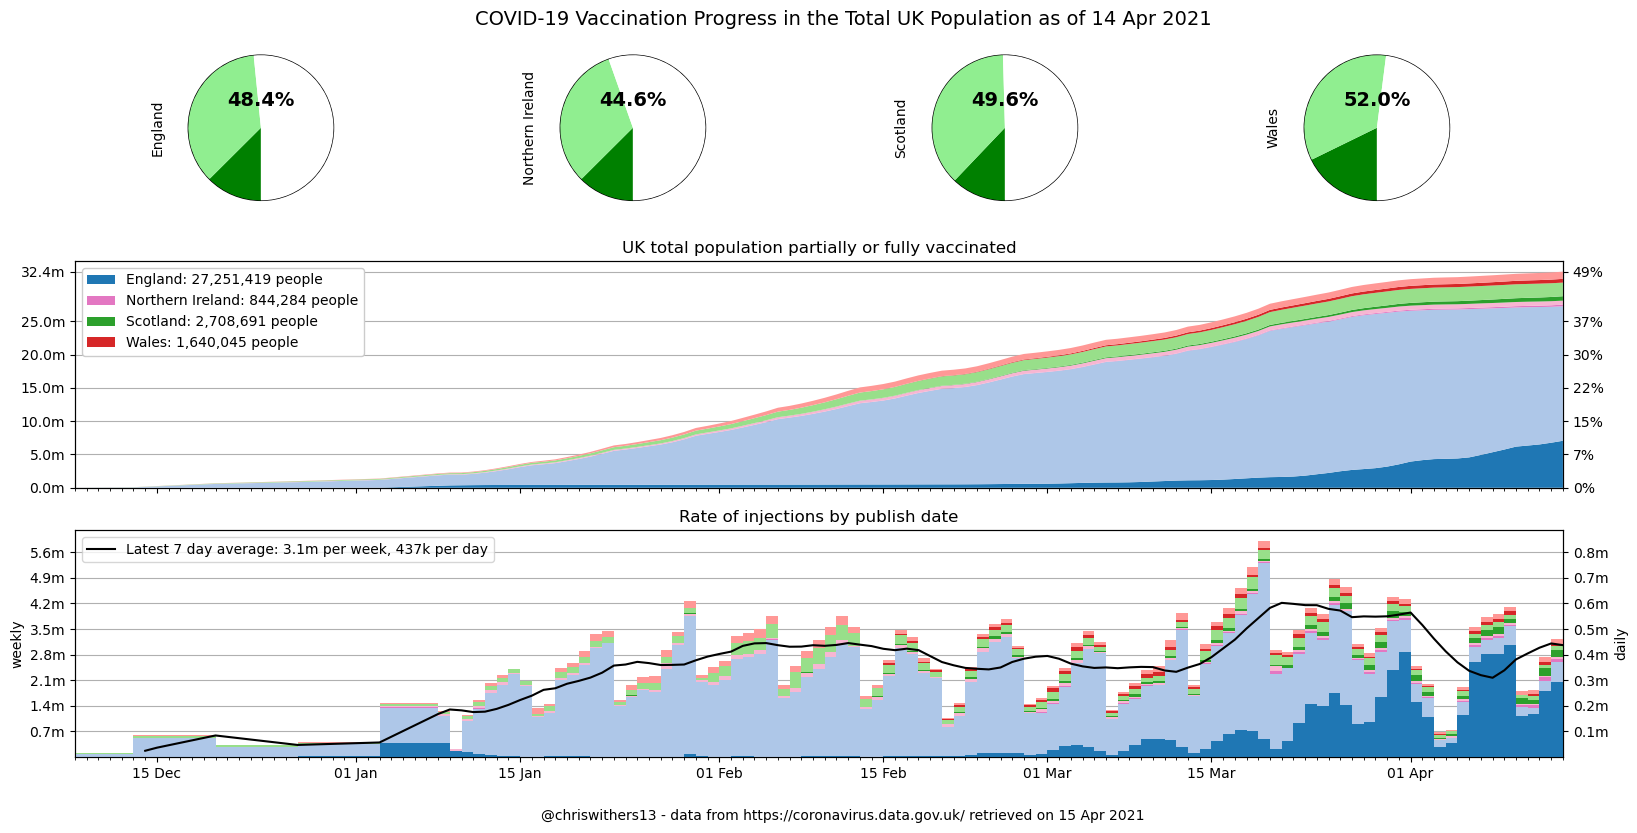

In [7]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

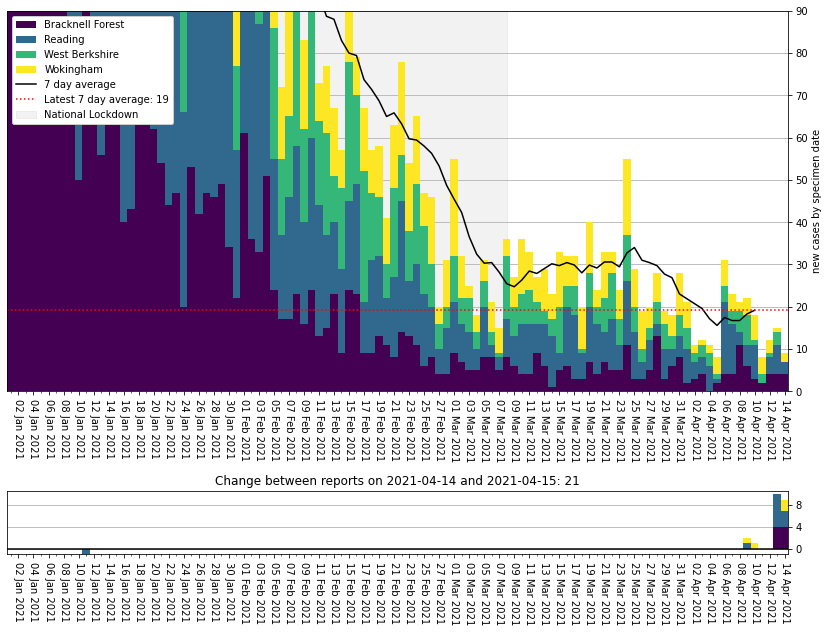

In [8]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=90)

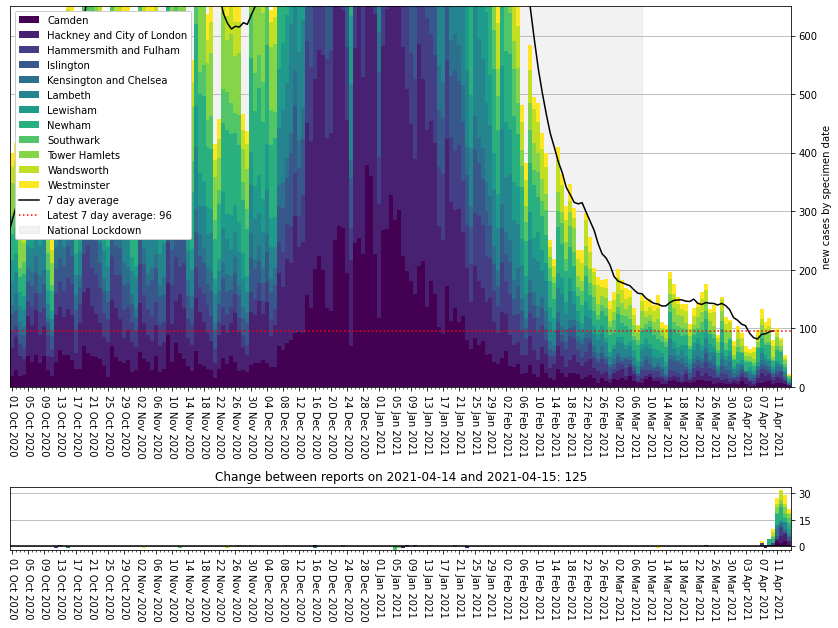

In [9]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
N09000005,Derry City and Strabane,105.100341,159.0,2021-04-14
E06000032,Luton,86.833261,185.0,2021-04-14
E08000017,Doncaster,78.232710,244.0,2021-04-14
E08000032,Bradford,71.511145,386.0,2021-04-14
E07000150,Corby,66.465424,48.0,2021-04-14
E07000136,Boston,65.552278,46.0,2021-04-14
E08000018,Rotherham,64.805151,172.0,2021-04-14
E08000016,Barnsley,62.382021,154.0,2021-04-14
E06000010,"Kingston upon Hull, City of",61.206107,159.0,2021-04-14


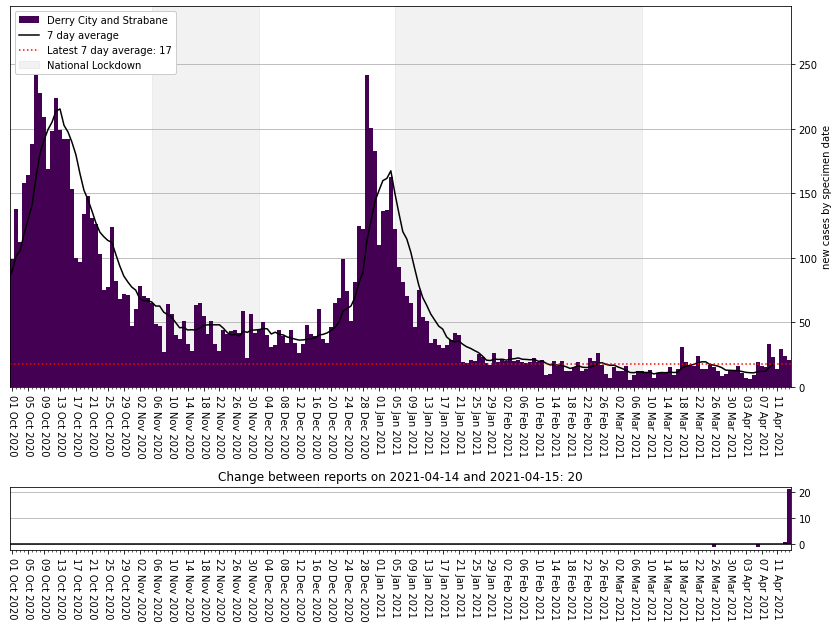

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000032,Bradford,71.511145,386.0,2021-04-14
E08000035,Leeds,43.624131,346.0,2021-04-14
S12000049,Glasgow City,51.806924,328.0,2021-04-14
E08000019,Sheffield,47.704295,279.0,2021-04-14
E08000025,Birmingham,23.383803,267.0,2021-04-14
E08000003,Manchester,46.847473,259.0,2021-04-14
E08000034,Kirklees,57.982614,255.0,2021-04-14
E08000017,Doncaster,78.232710,244.0,2021-04-14
E06000016,Leicester,60.978364,216.0,2021-04-14


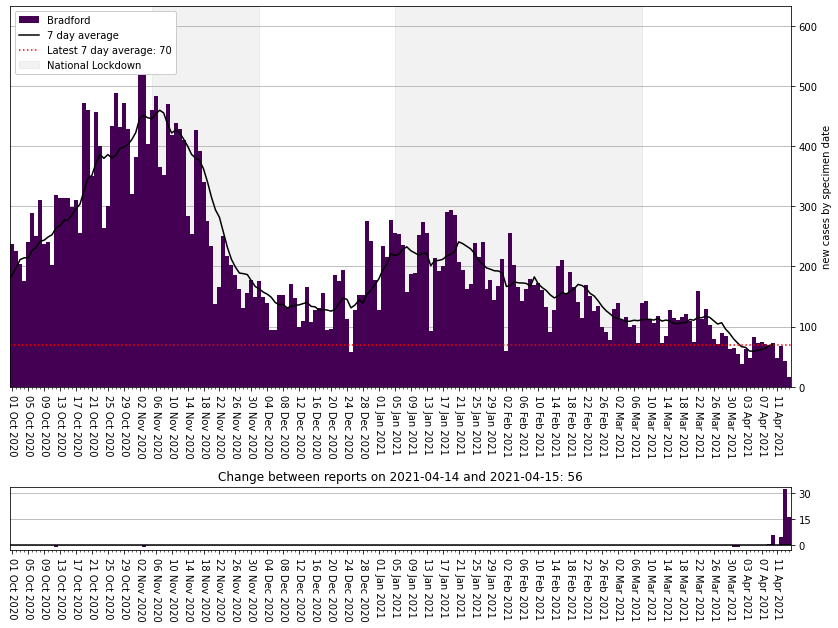

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [15]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.0
phe_max = 0.13

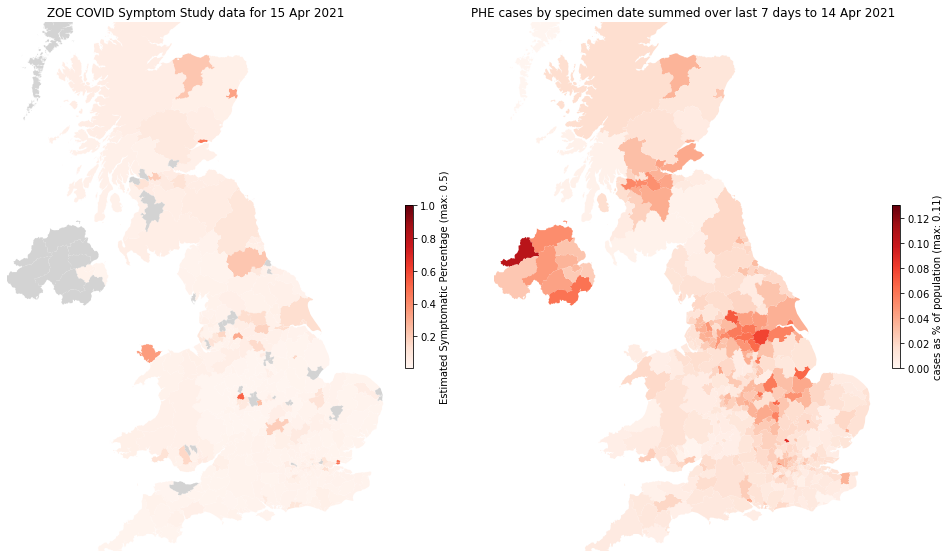

In [16]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [17]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...